In [61]:
!pip install seaborn

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

original_tips=sns.load_dataset('tips')
df=original_tips.copy()

display(df.head())
display(df.tail())

display(df.info())
display(df.describe().T)

display(df.dtypes)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


None

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


,0
total_bill,float64
tip,float64
sex,category
smoker,category
day,category
time,category
size,int64


The dataset has been analyzed, and an initial overview has been conducted.

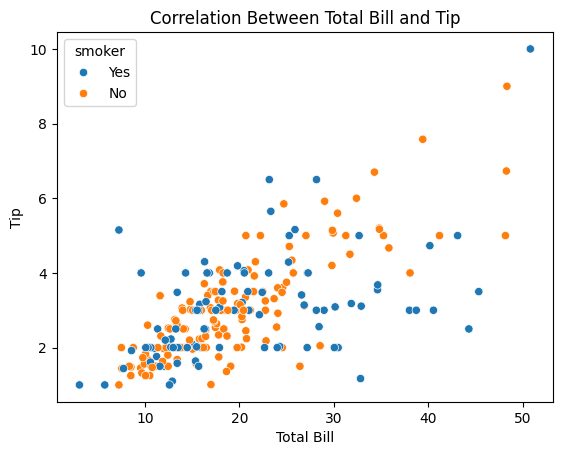

In [63]:
sns.scatterplot(data=df, x="total_bill", y="tip", hue='smoker')
plt.title('Correlation Between Total Bill and Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')

plt.show()

According to the chart, there is a linear increasion. Also there are some outlier values.

In [64]:
import pandas as pd
daily_total_bill = df.groupby('day')['total_bill'].sum().reset_index()
display(daily_total_bill)

<ipython-input-64-b605ce1db9d9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_total_bill = df.groupby('day')['total_bill'].sum().reset_index()


,day,total_bill
0,Thur,1096.33
1,Fri,325.88
2,Sat,1778.40
3,Sun,1627.16


According to the displayed table, most payed total bill sequence from top to bottom is; Saturday, Sunday, Thursday and Friday.

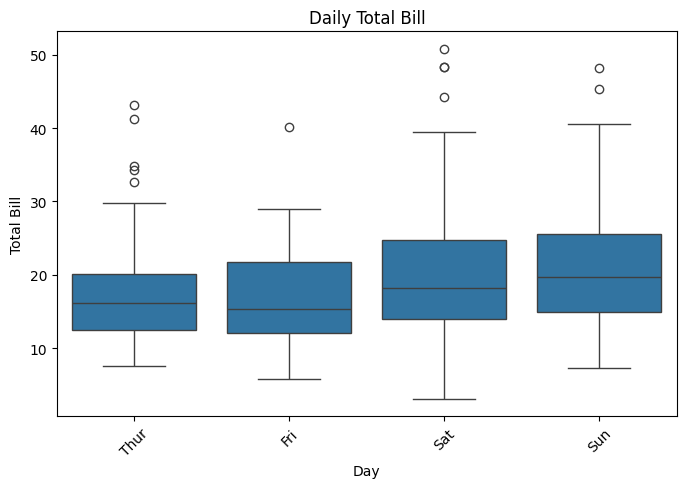

In [65]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='day', y='total_bill')
plt.title('Daily Total Bill')
plt.xlabel('Day')
plt.ylabel('Total Bill')
plt.xticks(rotation=45)
plt.show()

According to the chart; there is not any outlier value under the whiskers but there are some outliers above max whiskers. We can also understand that friday is the least paid day because limits and median is obviously llower then the others.

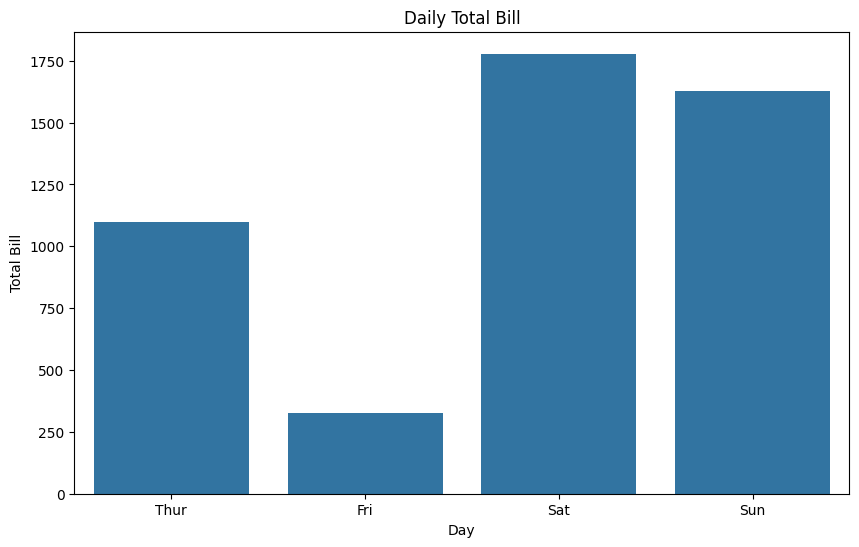

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(x='day', y='total_bill', data=daily_total_bill)
plt.title('Daily Total Bill')
plt.xlabel('Day')
plt.ylabel('Total Bill')
plt.show()

This chart is also approves us about our comment on the previous one.

In [25]:
df['tip_rate']=df['tip']/df['total_bill']*100
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


The tip rate has been calculated and saved as a new column.

<ipython-input-32-4ea8cf404bfd>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='size', y='tip_rate', data=df, palette='coolwarm', ci=95)
<ipython-input-32-4ea8cf404bfd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='size', y='tip_rate', data=df, palette='coolwarm', ci=95)


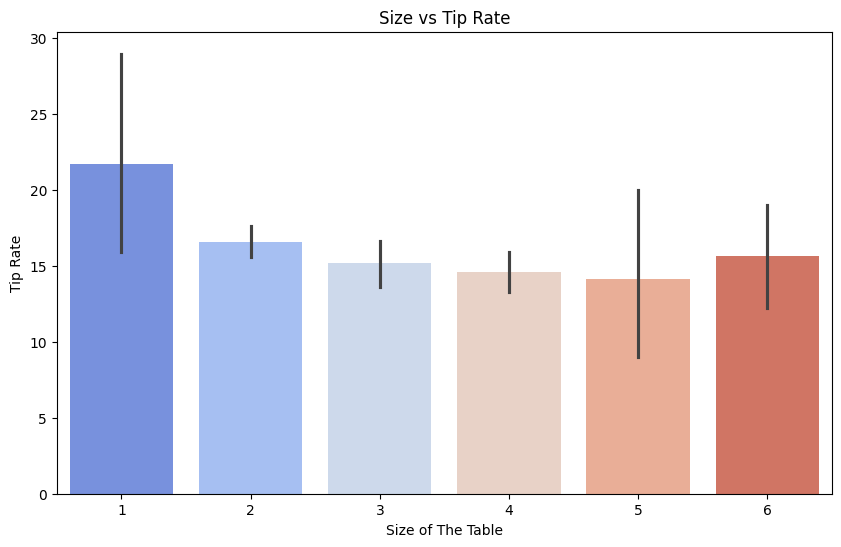

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='size', y='tip_rate', data=df, palette='coolwarm', ci=95)
plt.title('Size vs Tip Rate')
plt.xlabel('Size of The Table')
plt.ylabel('Tip Rate')
plt.show()

The chart shows us; when size of the table decrises, tip rate increases. but there is an exception. When the size of the table is 6 the tip rate becomes higher then table size 3.

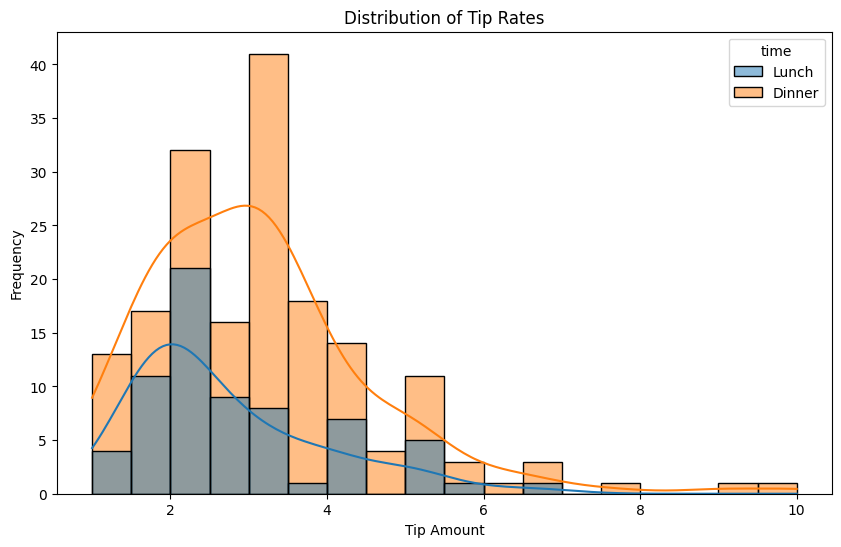

<ipython-input-47-1d9778eeea70>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('time')['tip'].sum()


,tip
time,
Lunch,185.51
Dinner,546.07


In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(data= df, x='tip', hue='time', kde=True)
plt.title('Distribution of Tip Rates')
plt.xlabel("Tip Amount")
plt.ylabel("Frequency")
plt.show()

df.groupby('time')['tip'].sum()

According to the chart, the tip amount for lunch is lower than for dinner. To double check, the tips were grouped by time and displayed. An obvious difference has been observed.

In [55]:
numeric_df = df.select_dtypes(include=['number'])

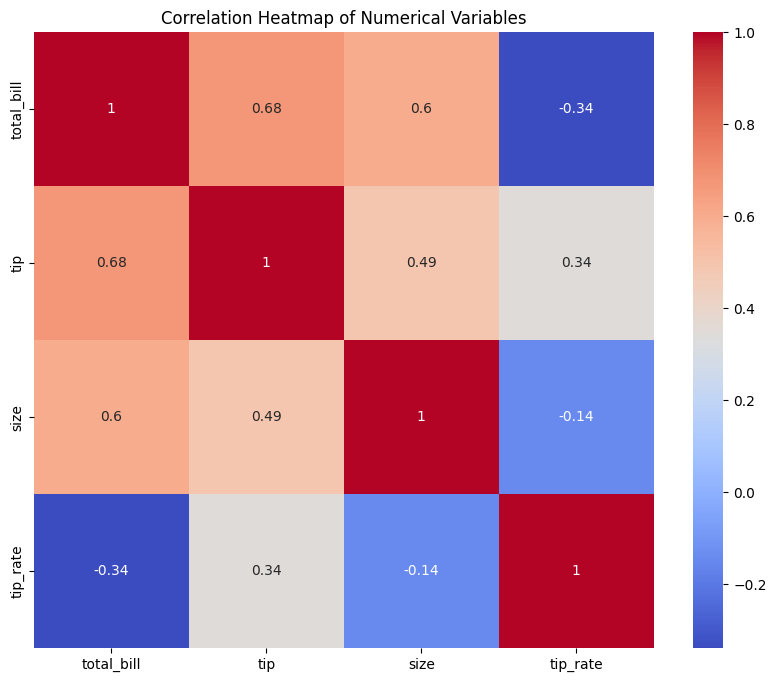

In [67]:
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


Lastly, a correlation heatmap was created. While there is a direct proportion between total bill and size, as well as total bill and tip, the tip rate and total bill have an inverse proportion. There are some strong relationships, all of which are direct proportions.